In [19]:
import numpy as np 
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from IPython.display import Image


import statsmodels.api as sma

from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso,Ridge,ElasticNet,SGDRegressor
import statsmodels.stats.api as ssa
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
#from mlxtend.feature_selection import SequentialFeatureSelector

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

In [20]:
df=pd.read_csv("media prediction and its cost.csv")
df.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,4.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [21]:
num_df = df.select_dtypes(include=np.number)
cat_df = df.select_dtypes(exclude=np.number)
df = df.drop('avg_cars_at home(approx)',axis=1)
num_df_to_be_power_transformed = num_df.drop(['total_children','avg_cars_at home(approx)','avg_cars_at home(approx).1','num_children_at_home','recyclable_package', 'low_fat', 'coffee_bar', 'video_store','salad_bar', 'prepared_food', 'florist'],axis=1)

In [22]:
#label encoding for martial status,gender and houseowner
label_encoder = LabelEncoder()
df['marital_status'] = label_encoder.fit_transform(df['marital_status'])
df['gender'] = label_encoder.fit_transform(df['gender'])
df['houseowner'] = label_encoder.fit_transform(df['houseowner'])



# Ordinal encoding for 'sales_country'
df['sales_country'] = df['sales_country'].replace('USA',2).replace('Mexico',1).replace('Canada',0)

# Ordinal encoding for 'member_card'
member_card_order = {'Golden': 1, 'Silver': 0, 'Bronze': 3, 'Normal': 2}
df['member_card'] = df['member_card'].map(member_card_order)

# Ordinal encoding for 'education'
education_order = {'Partial High School': 4, 'Bachelors Degree': 2, 'High School Degree': 3,
                       'Graduate Degree': 0, 'Partial College': 1}
df['education'] = df['education'].map(education_order)
# Ordinal encoding for 'store_type'
store_type_order = {'Deluxe Supermarket': 3, 'Supermarket': 4, 'Gourmet Supermarket': 2,
                        'Small Grocery': 0, 'Mid-Size Grocery': 1}
df['store_type'] = df['store_type'].map(store_type_order)
    
    
# Ordinal encoding for 'avg. yearly_income'
income_order = {
        '$10K - $30K': 6,
        '$30K - $50K': 7,
        '$50K - $70K': 5,
        '$70K - $90K': 3,
        '$90K - $110K': 2,
        '$110K - $130K': 4,
        '$130K - $150K': 1,
        '$150K +': 0
}

df['avg. yearly_income'] = df['avg. yearly_income'].map(income_order)


In [23]:
multiple_values_columns = ['occupation','food_category','food_department','promotion_name','brand_name','store_city','store_state','media_type']

for col in multiple_values_columns:
        melt_with_cost = pd.melt(df,id_vars=col,value_vars='cost',value_name='cost')
        mean_cost = np.ceil(melt_with_cost.groupby(by=col)['cost'].mean()).to_dict()
        df[col] = df[col].map(mean_cost)

In [24]:
df['food_family'] = df['food_family'].replace('Food',2).replace('Non-Consumable',1).replace('Drink',0)

In [25]:
num_df_to_be_power_transformed = num_df_to_be_power_transformed.drop('cost',axis=1)

In [26]:
df1 = df.copy()

In [27]:
for i in num_df_to_be_power_transformed.columns:
    df1[i] = df[i].apply(lambda x:np.sqrt(x))

In [28]:
df1.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,100.0,100.0,2,2.712932,1.650212,2.000000,107.0,2,0,0,1.0,4,2,100.0,1,6,1.0,1.0,100.0,1.356466,4.438468,4.207137,1.0,0.0,4.123106,3,85.0,95.0,166.415144,136.638208,73.586684,60.083276,1.0,1.0,1.0,1.0,1.0,98.0,126.62
1,100.0,100.0,2,2.349468,1.610714,1.732051,75.0,2,0,1,0.0,2,0,99.0,1,5,0.0,4.0,100.0,1.356466,4.438468,4.207137,1.0,0.0,4.123106,3,85.0,95.0,166.415144,136.638208,73.586684,60.083276,1.0,1.0,1.0,1.0,1.0,98.0,59.86
2,100.0,100.0,2,1.918333,1.166876,1.414214,96.0,2,1,0,4.0,4,2,99.0,0,6,0.0,1.0,100.0,1.356466,4.438468,4.207137,1.0,0.0,4.123106,3,85.0,95.0,166.415144,136.638208,73.586684,60.083276,1.0,1.0,1.0,1.0,1.0,98.0,84.16
3,100.0,100.0,2,1.918333,1.085173,1.414214,75.0,2,0,0,2.0,3,3,99.0,1,7,2.0,2.0,100.0,1.356466,4.438468,4.207137,1.0,0.0,4.123106,3,85.0,95.0,166.415144,136.638208,73.586684,60.083276,1.0,1.0,1.0,1.0,1.0,100.0,95.78
4,100.0,100.0,2,2.019901,1.194990,1.732051,81.0,2,0,1,0.0,4,3,100.0,0,7,0.0,2.0,101.0,1.166190,2.668333,2.260531,0.0,1.0,5.385165,3,85.0,95.0,166.415144,136.638208,73.586684,60.083276,1.0,1.0,1.0,1.0,1.0,97.0,50.79


In [29]:
X1 = df1.drop(columns='cost')
y1 = df1['cost']

X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size=.20,random_state=1)

In [30]:
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector

# SFS Forward with Best

In [31]:
lr = LinearRegression()
sfs_forward = SequentialFeatureSelector(estimator = lr,
                                       k_features='best',
                                       forward=True,
#                                        verbose=2,
                                       scoring = "neg_root_mean_squared_error")

sfs_forward.fit(X_train1, y_train1)
rmse = abs(sfs_forward.k_score_)
print(rmse)

24.811036808392693


In [32]:
newx = X_train1.loc[:,sfs_forward.k_feature_names_]
testx = X_test1.loc[:,sfs_forward.k_feature_names_]

In [33]:
lr = LinearRegression()
model_sfs = lr.fit(newx,y_train1)
pred_train = model_sfs.predict(newx)
pred_test = model_sfs.predict(testx)

In [34]:
r2_train = r2_score(y_train1,pred_train)
r2_test = r2_score(y_test1,pred_test)
print('R2 Train:',r2_train)
print('R2 Test:',r2_test)
print('RMSE Train:',np.sqrt(mean_squared_error(y_train1,pred_train)))
print('RMSE Test:',np.sqrt(mean_squared_error(y_test1,pred_test)))

R2 Train: 0.318661850437441
R2 Test: 0.30805324095307385
RMSE Train: 24.796764416370745
RMSE Test: 24.86328291038327


# SFS backward with best

In [35]:
lr = LinearRegression()
sfs_backward = SequentialFeatureSelector(estimator = lr,
                                       k_features='best',
                                       forward=False,
#                                        verbose=2,
                                       scoring = "neg_root_mean_squared_error")

sfs_backward.fit(X_train1, y_train1)

rmse=abs(sfs_backward.k_score_)
print(rmse)

24.810297087651644


In [36]:
newx = X_train1.loc[:,sfs_backward.k_feature_names_]
testx = X_test1.loc[:,sfs_backward.k_feature_names_]

In [37]:
lr = LinearRegression()
model_sfs = lr.fit(newx,y_train1)
pred_train = model_sfs.predict(newx)
pred_test = model_sfs.predict(testx)

In [38]:
r2_train = r2_score(y_train1,pred_train)
r2_test = r2_score(y_test1,pred_test)
print('R2 Train:',r2_train)
print('R2 Test:',r2_test)
print('RMSE Train:',np.sqrt(mean_squared_error(y_train1,pred_train)))
print('RMSE Test:',np.sqrt(mean_squared_error(y_test1,pred_test)))

R2 Train: 0.3186461133092565
R2 Test: 0.3079873053683755
RMSE Train: 24.797050784899454
RMSE Test: 24.86446749288376


# RFE

In [39]:
rfe = RFE(estimator=lr,
         n_features_to_select=5)
rfe.fit(X_train1, y_train1)
feature_index = pd.Series(rfe.ranking_,index=X_train1.columns).sort_values(ascending=False)

In [40]:
impfeature_rfe = feature_index[feature_index==1].index

In [42]:
newx = X_train1.loc[:,impfeature_rfe]
testx = X_test1.loc[:,impfeature_rfe]

In [43]:
lr = LinearRegression()
model_rfe = lr.fit(newx,y_train1)
pred_train = model_rfe.predict(newx)
pred_test = model_rfe.predict(testx)

In [44]:
r2_train = r2_score(y_train1,pred_train)
r2_test = r2_score(y_test1,pred_test)
print('R2 Train:',r2_train)
print('R2 Test:',r2_test)
print('RMSE Train:',np.sqrt(mean_squared_error(y_train1,pred_train)))
print('RMSE Test:',np.sqrt(mean_squared_error(y_test1,pred_test)))

R2 Train: 0.01445609173506024
R2 Test: 0.017547474015815134
RMSE Train: 29.823022185357992
RMSE Test: 29.626334277493633


# Decision Tree

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
DT = DecisionTreeRegressor(random_state=1)
model = DT.fit(X_train1,y_train1)
pred_test = model.predict(X_test1)
pred_train = model.predict(X_train1)

In [49]:
r2_train = r2_score(y_train1,pred_train)
r2_test = r2_score(y_test1,pred_test)
print('R2 Train:',r2_train)
print('R2 Test:',r2_test)
print('RMSE Train:',np.sqrt(mean_squared_error(y_train1,pred_train)))
print('RMSE Test:',np.sqrt(mean_squared_error(y_test1,pred_test)))

R2 Train: 1.0
R2 Test: 0.9920751589157287
RMSE Train: 2.7276602183497487e-13
RMSE Test: 2.660831743416233


# Decision Tree with Best Params

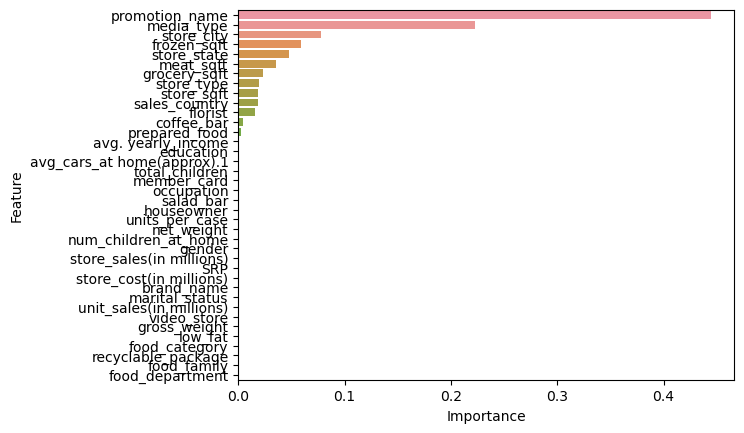

In [50]:
feature1 = pd.DataFrame({'Feature':X_train1.columns,'Importance':DT.feature_importances_})
feature1 = feature1.sort_values('Importance',ascending=False)
sns.barplot(x='Importance',y='Feature',data=feature1)
plt.show()

In [51]:
first_column = feature1.iloc[:10, 0]

In [52]:
newx = X_train1.loc[:,first_column]
testx = X_test1.loc[:,first_column]

In [53]:
DT = DecisionTreeRegressor(random_state=1)
model = DT.fit(newx,y_train1)
pred_test = model.predict(testx)
pred_train = model.predict(newx)

In [54]:
r2_train = r2_score(y_train1,pred_train)
r2_test = r2_score(y_test1,pred_test)
print('R2 Train:',r2_train)
print('R2 Test:',r2_test)
print('RMSE Train:',np.sqrt(mean_squared_error(y_train1,pred_train)))
print('RMSE Test:',np.sqrt(mean_squared_error(y_test1,pred_test)))

R2 Train: 0.9908359554250702
R2 Test: 0.990914553534609
RMSE Train: 2.875790595554155
RMSE Test: 2.849018496431534


# Decision Tree with SFS best

In [55]:
newx = X_train1.loc[:,sfs_forward.k_feature_names_]
testx = X_test1.loc[:,sfs_forward.k_feature_names_]

In [56]:
DT = DecisionTreeRegressor(random_state=1)
model = DT.fit(newx,y_train1)
pred_test = model.predict(testx)
pred_train = model.predict(newx)


In [57]:
r2_train = r2_score(y_train1,pred_train)
r2_test = r2_score(y_test1,pred_test)
print('R2 Train:',r2_train)
print('R2 Test:',r2_test)
print('RMSE Train:',np.sqrt(mean_squared_error(y_train1,pred_train)))
print('RMSE Test:',np.sqrt(mean_squared_error(y_test1,pred_test)))

R2 Train: 1.0
R2 Test: 0.9924812262777051
RMSE Train: 2.6601441057844663e-13
RMSE Test: 2.5917651113710654


# Decision Tree with SFS backward best

In [58]:
newx = X_train1.loc[:,sfs_backward.k_feature_names_]
testx = X_test1.loc[:,sfs_backward.k_feature_names_]

In [59]:
DT = DecisionTreeRegressor(random_state=1)
model = DT.fit(newx,y_train1)
pred_test = model.predict(testx)
pred_train = model.predict(newx)

In [60]:
r2_train = r2_score(y_train1,pred_train)
r2_test = r2_score(y_test1,pred_test)
print('R2 Train:',r2_train)
print('R2 Test:',r2_test)
print('RMSE Train:',np.sqrt(mean_squared_error(y_train1,pred_train)))
print('RMSE Test:',np.sqrt(mean_squared_error(y_test1,pred_test)))

R2 Train: 1.0
R2 Test: 0.9896626892688383
RMSE Train: 2.619636499972008e-13
RMSE Test: 3.038966533313701


# Decision Tree with RFE

In [61]:
newx = X_train1.loc[:,impfeature_rfe]
testx = X_test1.loc[:,impfeature_rfe]

In [62]:
DT = DecisionTreeRegressor(random_state=1)
model = DT.fit(newx,y_train1)
pred_test = model.predict(testx)
pred_train = model.predict(newx)

In [63]:
r2_train = r2_score(y_train1,pred_train)
r2_test = r2_score(y_test1,pred_test)
print('R2 Train:',r2_train)
print('R2 Test:',r2_test)
print('RMSE Train:',np.sqrt(mean_squared_error(y_train1,pred_train)))
print('RMSE Test:',np.sqrt(mean_squared_error(y_test1,pred_test)))

R2 Train: 0.05330162587570775
R2 Test: 0.052042527676641526
RMSE Train: 29.229371578828456
RMSE Test: 29.101579360910232


# Decision Tree with GridSearchCV

In [64]:
params = {'max_depth':[5,6,7],'min_samples_split':[2,5,8]}
dtree = DecisionTreeRegressor(random_state=1)
dtcv = GridSearchCV(dtree,params,scoring='accuracy')
dtcv.fit(X_train1,y_train1)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [2, 5, 8]},
             scoring='accuracy')

In [65]:
dtcv.best_params_

{'max_depth': 5, 'min_samples_split': 2}

In [67]:
DT = DecisionTreeRegressor(random_state=1,max_depth=5,min_samples_split=2)
DT = DecisionTreeRegressor(random_state=1)
model = DT.fit(X_train1,y_train1)
pred_test = model.predict(X_test1)
pred_train = model.predict(X_train1)

In [68]:
r2_train = r2_score(y_train1,pred_train)
r2_test = r2_score(y_test1,pred_test)
print('R2 Train:',r2_train)
print('R2 Test:',r2_test)
print('RMSE Train:',np.sqrt(mean_squared_error(y_train1,pred_train)))
print('RMSE Test:',np.sqrt(mean_squared_error(y_test1,pred_test)))

R2 Train: 1.0
R2 Test: 0.9920751589157287
RMSE Train: 2.7276602183497487e-13
RMSE Test: 2.660831743416233
